In [2]:
%matplotlib notebook
#this is important,I removed it and plot using subplot but didnt work,have to see why it is important
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


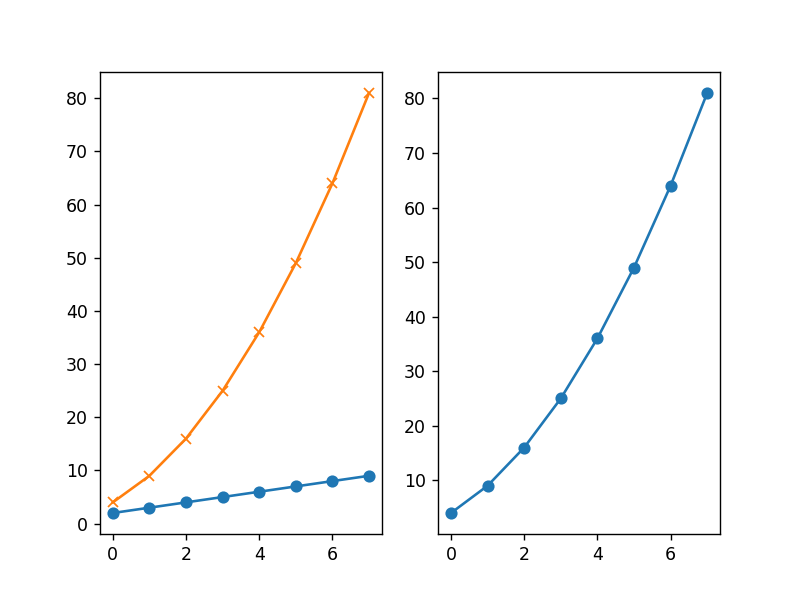

In [3]:
plt.figure()
plt.subplot(1,2,1)#will divide the figure to 1 row and 2 columns and choose 1st subplot among the two to plot on it
linear_data=np.array([2,3,4,5,6,7,8,9])
plt.plot(linear_data,'-o')

In [4]:
quadratic_data=linear_data**2
plt.subplot(1,2,2)#will draw 2nd subplot means second column of figure
plt.plot(quadratic_data,'-o')

In [5]:
plt.subplot(1,2,1)#get the 1st subplot axes and continue implementation on it
plt.plot(quadratic_data,'-x')

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


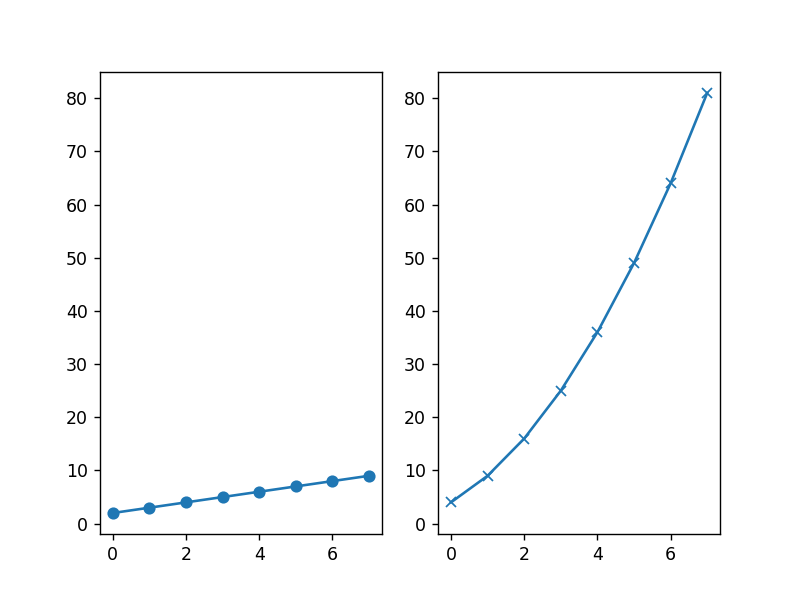

In [6]:
plt.figure()
ax1=plt.subplot(1,2,1)
plt.plot(linear_data,'-o')
ax2=plt.subplot(1,2,2,sharey=ax1)#here we are sharing y axis for both subplots,so data scaling in y axis for both plots will be considering both y values
plt.plot(quadratic_data,'-x')#one quick way to see if they are sharing yaxis is zoom one plot it will aplly to amother plot along y axis

<IPython.core.display.Javascript object>


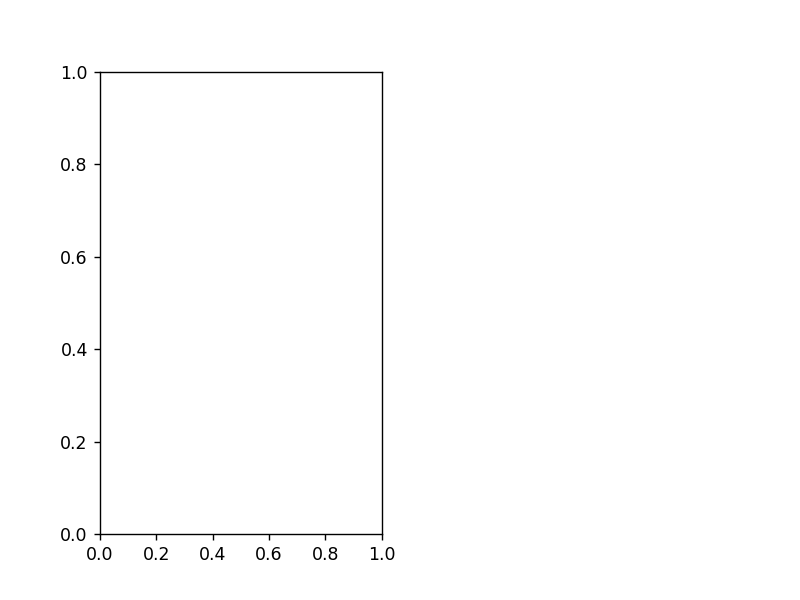

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

In [7]:
plt.figure()
plt.subplot(1,2,1)==plt.subplot(121)#both representation are same

<IPython.core.display.Javascript object>


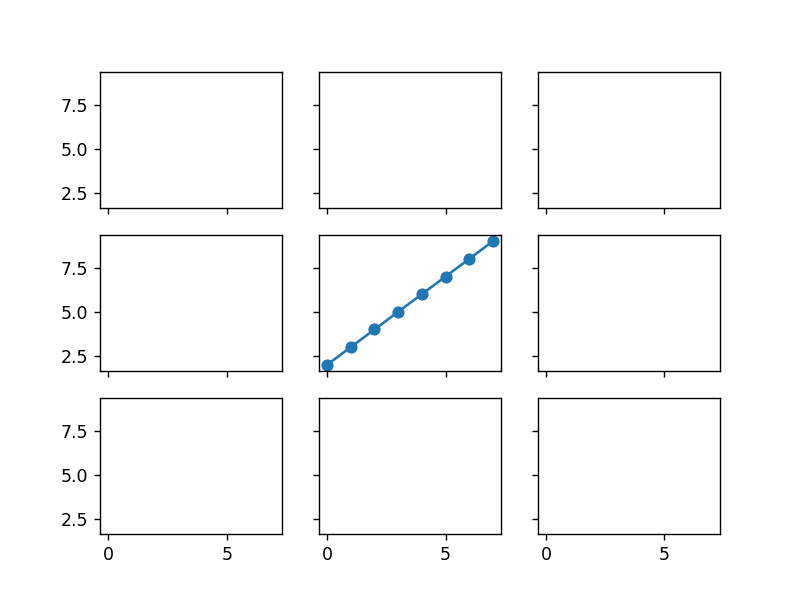

In [8]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,sharex=True,sharey=True)#create 9 subplots each returning diff axes object
ax5.plot(linear_data,'-o')#problem here is by deafault x and y label will be only for bottom and left subplots

In [9]:
#we can add label to each subplot using the axis object it is returning or we can iterate through each subplot and add label for each
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [10]:
plt.gcf().canvas.draw()#gcf to get current figure,we are redrawing canvas to force the figure to update axes label

In [11]:
#### Histogram

<IPython.core.display.Javascript object>


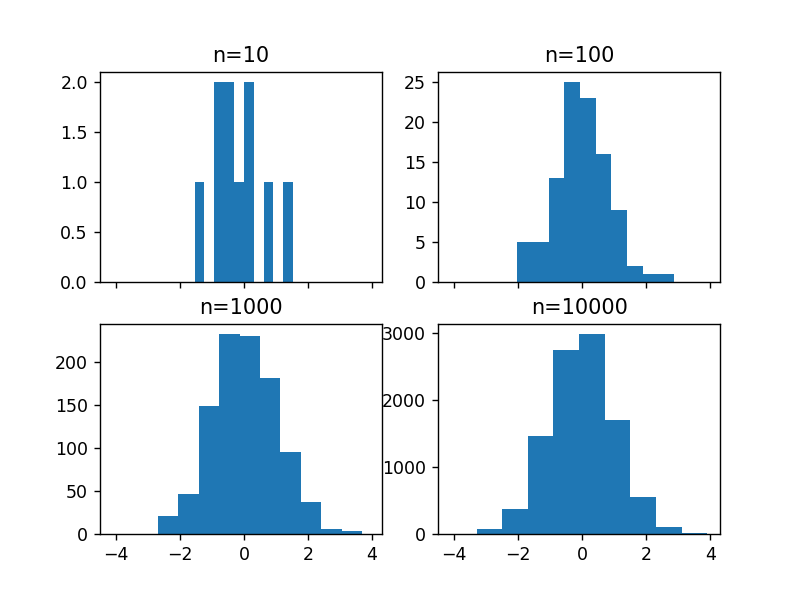

In [12]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
ax=[ax1,ax2,ax3,ax4]
for n in range(len(ax)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    ax[n].hist(sample)
    ax[n].set_title('n={}'.format(sample_size))
    #here notice that for small sample size width of blue regions are small.this is bcoz in histogram x axis is divided into bins
    #bin is range of values.suppose x axis is going to have values from 0.5 to 10.5,then bin width is (10.5-10)/no of bins,by default no of bins =10
    #so each bin having width=1 and range varies as 0.5-1.5,1.5-2.5,......
    #in case of small sample the no of data points corresponing to bin is less,so width of blue lines are small

<IPython.core.display.Javascript object>


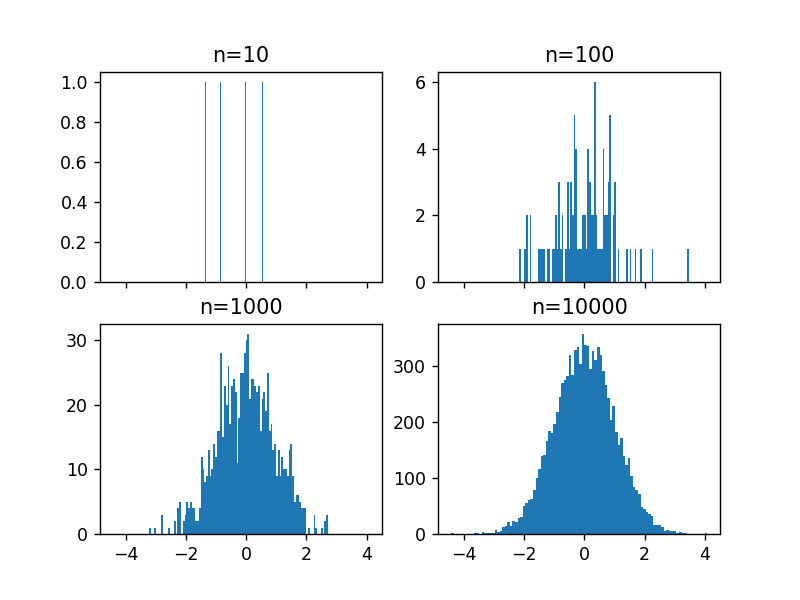

In [13]:
#setting bin=100
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
ax=[ax1,ax2,ax3,ax4]
for n in range(len(ax)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    ax[n].hist(sample,bins=100)
    ax[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


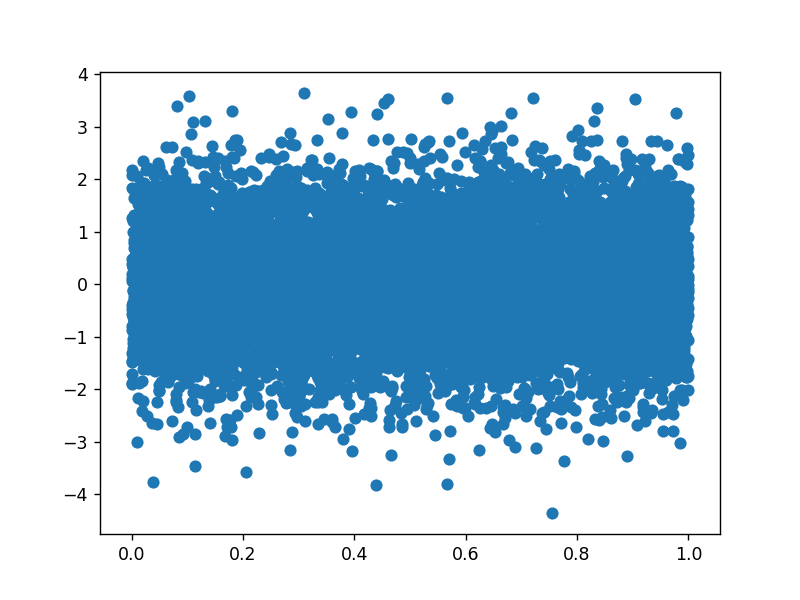

In [14]:
plt.figure()
y=np.random.normal(loc=0.0,scale=1.0,size=10000)
x=np.random.random(10000)
plt.scatter(x,y)

<IPython.core.display.Javascript object>


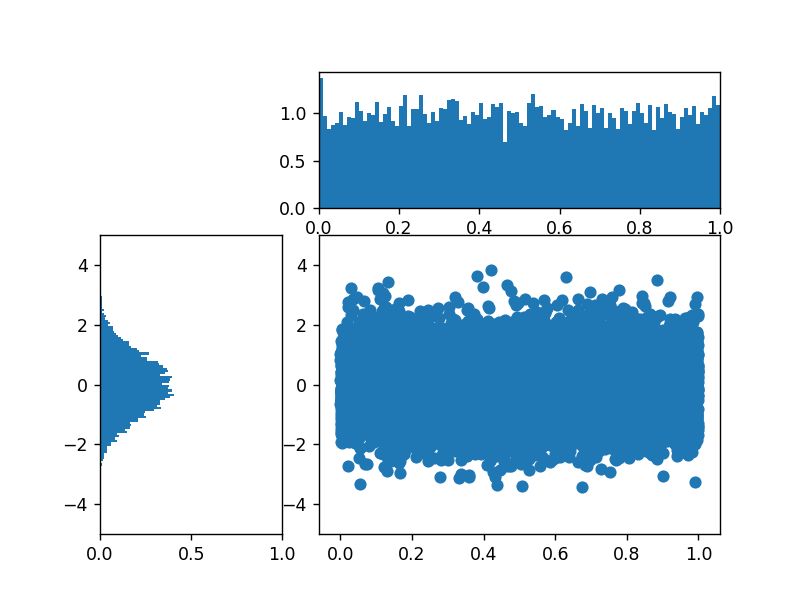

In [15]:
import matplotlib.gridspec as gs
plt.figure()
gsc=gs.GridSpec(3,3)#gridspec is used to create grid in figure,we can use non homogeneous part of grid to plot subplots
top=plt.subplot(gsc[0,1:])
left=plt.subplot(gsc[1:,0])
bot=plt.subplot(gsc[1:,1:])

In [16]:
y=np.random.normal(loc=0.0,scale=1.0,size=10000)
x=np.random.random(10000)
bot.scatter(x,y)
top.hist(x,bins=100)
s=left.hist(y,bins=100,orientation='horizontal')

In [17]:
top.clear()#clears the subplot individually
top.hist(x,bins=100,normed=True)#makes frequency(y axis value) of distribution to scale between 0 and 1
left.clear()
left.hist(y,bins=100,orientation='horizontal',normed=True)
left.invert_xaxis()#inverts the x-axis from left to right

In [18]:
for ax in [top,left]:
    ax.set_xlim(0,1)
for ax in [left,bot]:
    ax.set_ylim(-5,5)
    
    

In [19]:
####Box Plots-for aggregate statistics

In [20]:
import pandas as pd
normal=np.random.normal(loc=0.0,scale=1.0,size=10000)
random=np.random.random(10000)
gamma=np.random.gamma(2,size=10000)
df=pd.DataFrame({'normal':normal,'random':random,'gamma':gamma})
#create a dataframe containing 3 types of distribution

In [21]:
df.describe()#here %(25,50,75) indicates variability of data like Standard deviation
#1st quartile is min value and 25% of data,2nd quartile(25%-50% of data).all 4 quartiles called inter quartile

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.008508,0.007245,0.503952
std,1.408784,1.001495,0.287885
min,0.018883,-3.790575,0.000234
25%,0.982562,-0.656905,0.252431
50%,1.686823,0.005591,0.508233
75%,2.687078,0.671755,0.750736
max,13.231707,3.720391,0.999992


<IPython.core.display.Javascript object>


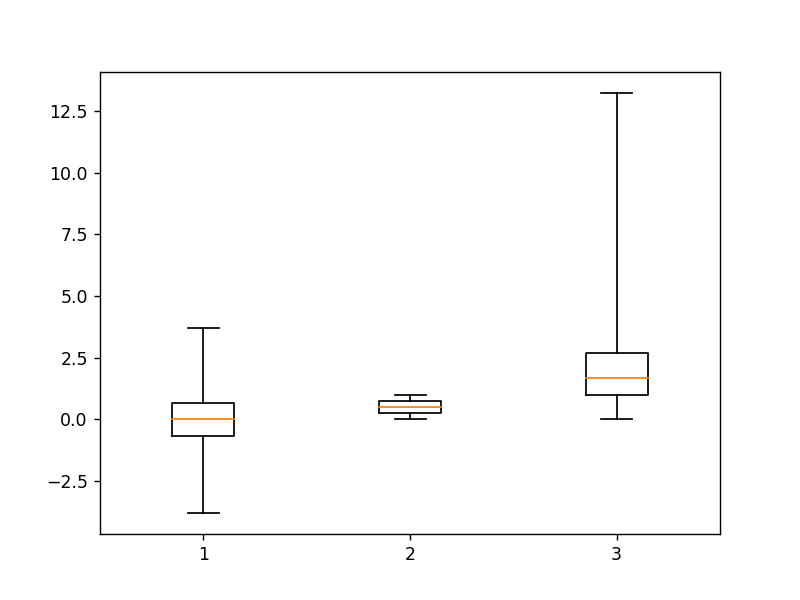

In [22]:
plt.figure()
_=plt.boxplot(df['normal'],whis='range')#set the range of plot from minimum to maximum
#assigning return value to underscore is a pattern to store unused return value

In [23]:
plt.clf()#clear current figure
_=plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')#we have to pass each column individually inside an array,dont have support to pass whole data frame

<IPython.core.display.Javascript object>


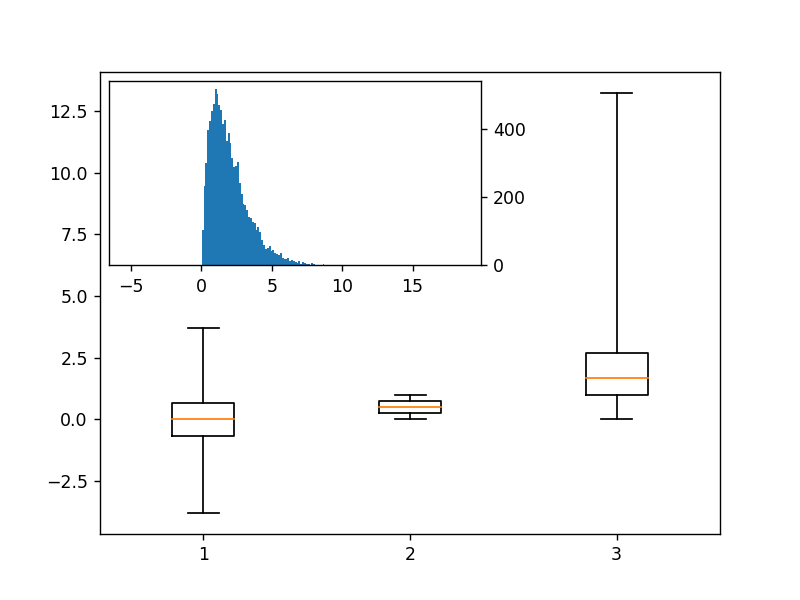

In [24]:
import mpl_toolkits.axes_grid1.inset_locator as il
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')
ax=il.inset_axes(plt.gca(),width='60%',height='40%',loc=2)
ax.hist(df['gamma'],bins=100)#plotting histogram as a layer on top of boxplot
ax.margins(x=0.5)
ax.yaxis.tick_right()#set label of yaxis to right

<IPython.core.display.Javascript object>


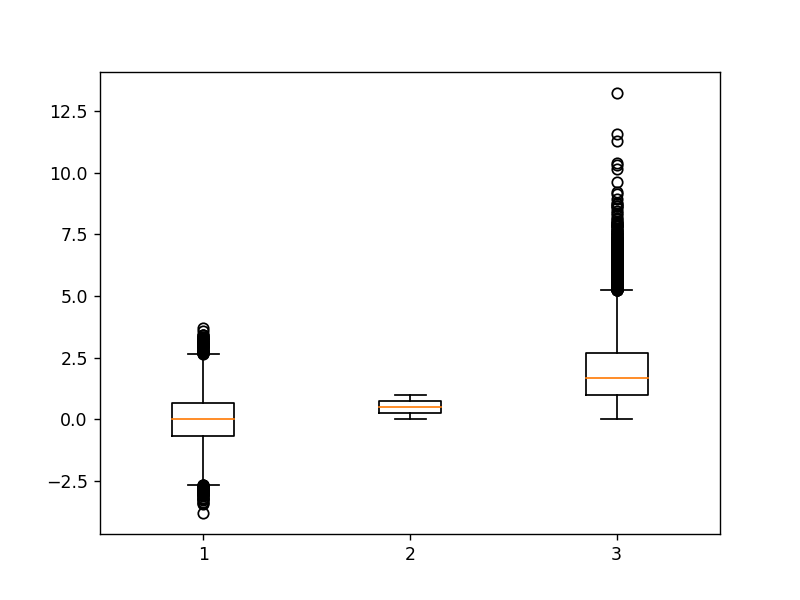

{'boxes': [<matplotlib.lines.Line2D at 0x7fe19f880a58>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe19f8875c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe19f88d320>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe19f887e80>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe19f880be0>,
  <matplotlib.lines.Line2D at 0x7fe19f897f60>]}

In [25]:
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']])#without whis parameter the plot shows the outliers means data points not in range

In [26]:
####Heatmaps or 2d Hist

<IPython.core.display.Javascript object>


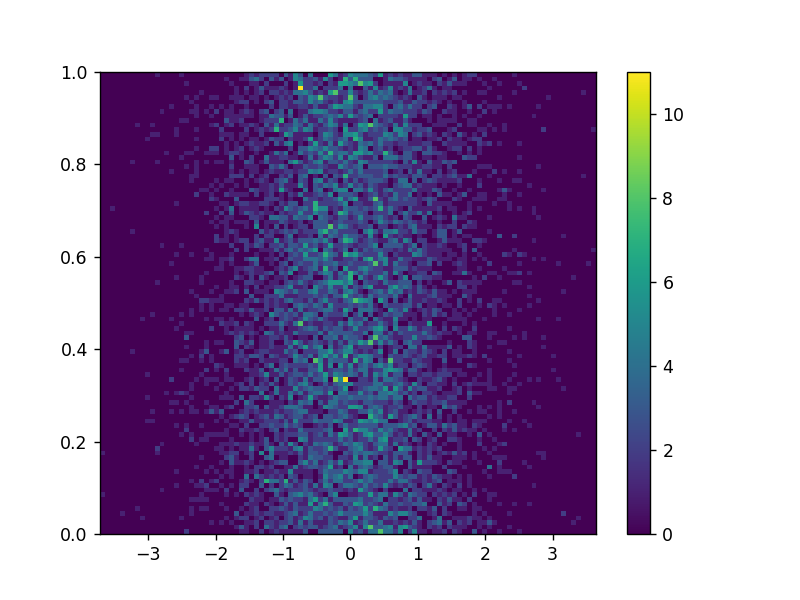

In [27]:
#plot 2d data as histogram,z axis is the base axis and x,y axis are normal and random axis
plt.figure()
normal=np.random.normal(loc=0.0,scale=1.0,size=10000)
random=np.random.random(10000)
_=plt.hist2d(normal,random,bins=100)

In [28]:
plt.colorbar()#shows value of each color data point

In [29]:
####Animations

In [30]:
import matplotlib.animation as animation
n=100
x=np.random.randn(n)

In [37]:
def update(curr):
    if curr==n:
        a.event_source.stop()
    bins=np.arange(-4,4,0.5)#given spacing as bin,so x axis will be spaced from -4 to 4 with space 0.5
    plt.cla()
    plt.hist(x[:curr],bins=bins)#curr means the no of times the frame is updated or the method is called
    plt.axis([-4,4,0,30])#x1,x2,y1,y2
    plt.gca().set_title('sampling normal distribution')
    plt.gca().set_ylabel('frequency')
    plt.gca().set_xlabel('value')
    plt.annotate('n={}'.format(curr),[3,27])#display some updated value in fig,[3,27] is the coordinate to show it on figure

<IPython.core.display.Javascript object>


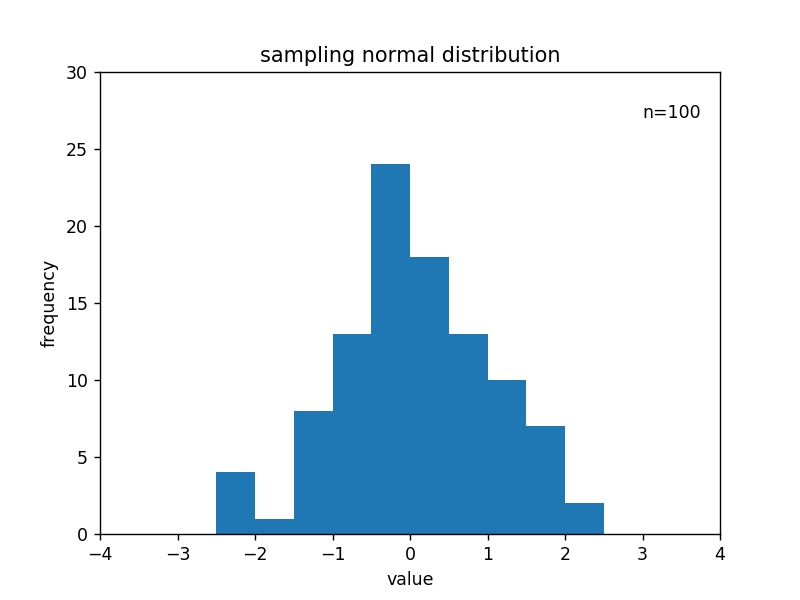

In [38]:
fig=plt.figure()
a=animation.FuncAnimation(fig,update,interval=1000)#call update method in every 1000ms interval